Name: Siddharth Byale

Github username : sidb98

USC ID : 5284615575

Late Days Used : 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("../../data/aps_failure_training_set.csv", skiprows=20, na_values="na")
train_df['class'] = train_df['class'].replace(to_replace=['neg', 'pos'], value=[0,1])
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
test_df = pd.read_csv("../../data/aps_failure_test_set.csv", skiprows=20, na_values="na")
test_df['class'] = test_df['class'].replace(to_replace=['neg', 'pos'], value=[0,1])
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


## b) Data Preparation
i. Research what types of techniques are usually used for dealing with data with
missing values.2 Pick at least one of them and apply it to this data in the
next steps.

Different ways to deal with missing values

Row wise deletion, Value(Mean,median,mode) substitution, Predicting The Missing Values, Using Algorithms Which Support Missing Values(like KNN) techniques are used for dealing with the missing data value. 

In [5]:
train_df.isna().sum(), max(train_df.isna().sum())

(class         0
 aa_000        0
 ab_000    46329
 ac_000     3335
 ad_000    14861
           ...  
 ee_007      671
 ee_008      671
 ee_009      671
 ef_000     2724
 eg_000     2723
 Length: 171, dtype: int64,
 49264)

In [6]:
test_df.isna().sum(), max(test_df.isna().sum())

(class         0
 aa_000        0
 ab_000    12363
 ac_000      926
 ad_000     3981
           ...  
 ee_007      192
 ee_008      192
 ee_009      192
 ef_000      762
 eg_000      762
 Length: 171, dtype: int64,
 13129)

In [7]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan ,strategy="mean")
train_df = pd.DataFrame(imp_mean.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imp_mean.transform(test_df), columns=test_df.columns)


In [8]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [9]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0.0,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0.0,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0.0,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0.0,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [10]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

ii) For each of the 170 features, calculate the coefficient of variation CV = s
m,
where s is sample standard deviation and m is sample mean.


In [11]:
cof_var = X_train.apply(lambda x: np.std(x)/np.mean(x), axis=0)
cof_var

aa_000      2.450917
ab_000      2.328381
ac_000      2.169748
ad_000    183.846088
ae_000     23.190743
             ...    
ee_007      4.962441
ee_008      3.221983
ee_009      5.626932
ef_000     47.124560
eg_000     40.552912
Length: 170, dtype: float64

iii) Plot a correlation matrix for your features using pandas or any other tool

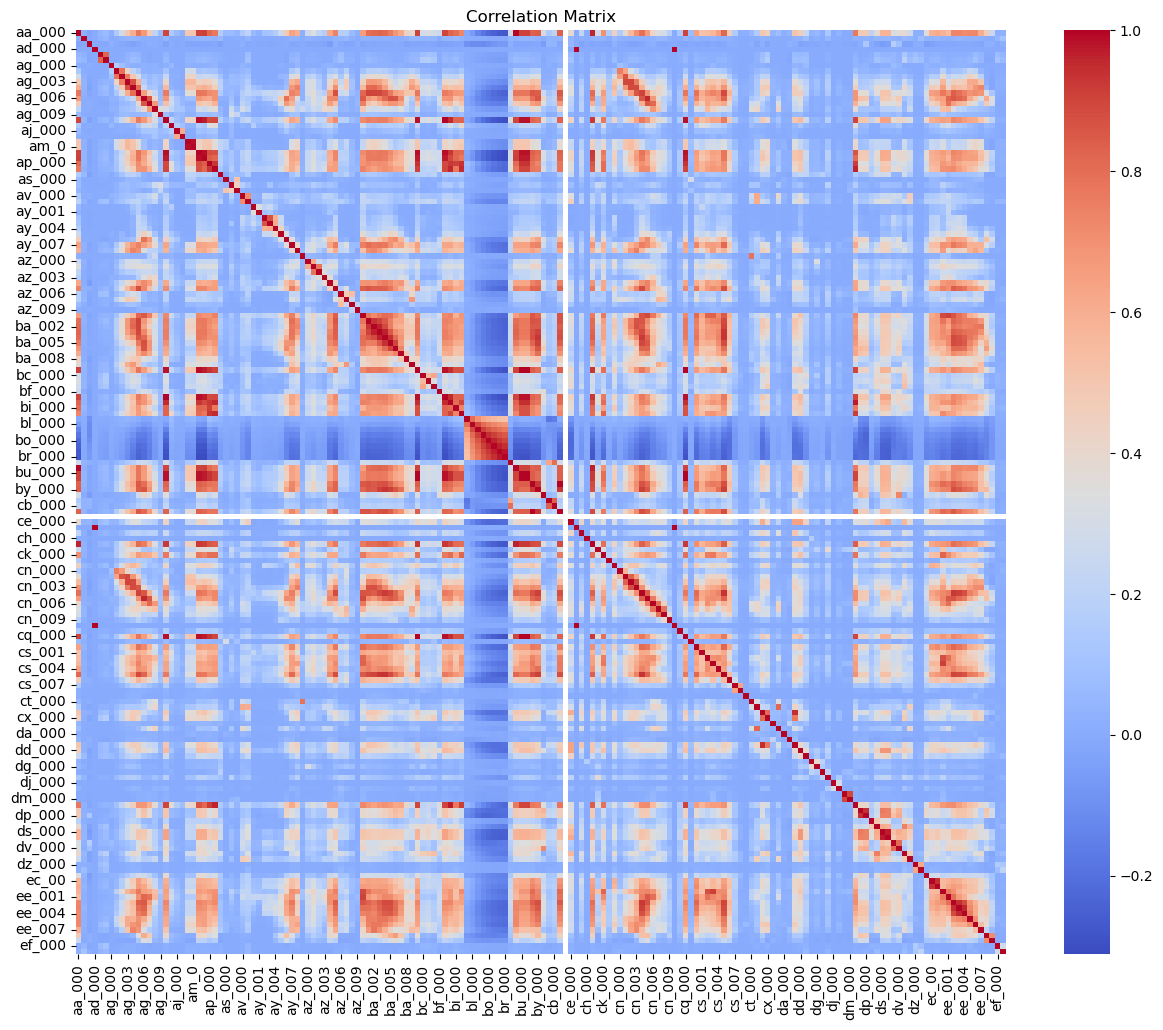

In [12]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(X_train.corr(), ax = ax, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

iv) Pick  $\sqrt{170}$ features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [13]:
import math

x = math.floor(math.sqrt(170))
top_features = cof_var.nlargest(n=x)
top_features

cs_009    235.275644
cf_000    184.231557
co_000    183.947485
ad_000    183.846088
dh_000    114.984033
dj_000    109.646371
ag_000     91.877799
as_000     86.416184
ay_009     83.785365
az_009     76.967337
ak_000     74.526067
au_000     68.159986
ch_000     58.267743
dtype: float64

In [14]:
top_features.index.tolist()

['cs_009',
 'cf_000',
 'co_000',
 'ad_000',
 'dh_000',
 'dj_000',
 'ag_000',
 'as_000',
 'ay_009',
 'az_009',
 'ak_000',
 'au_000',
 'ch_000']

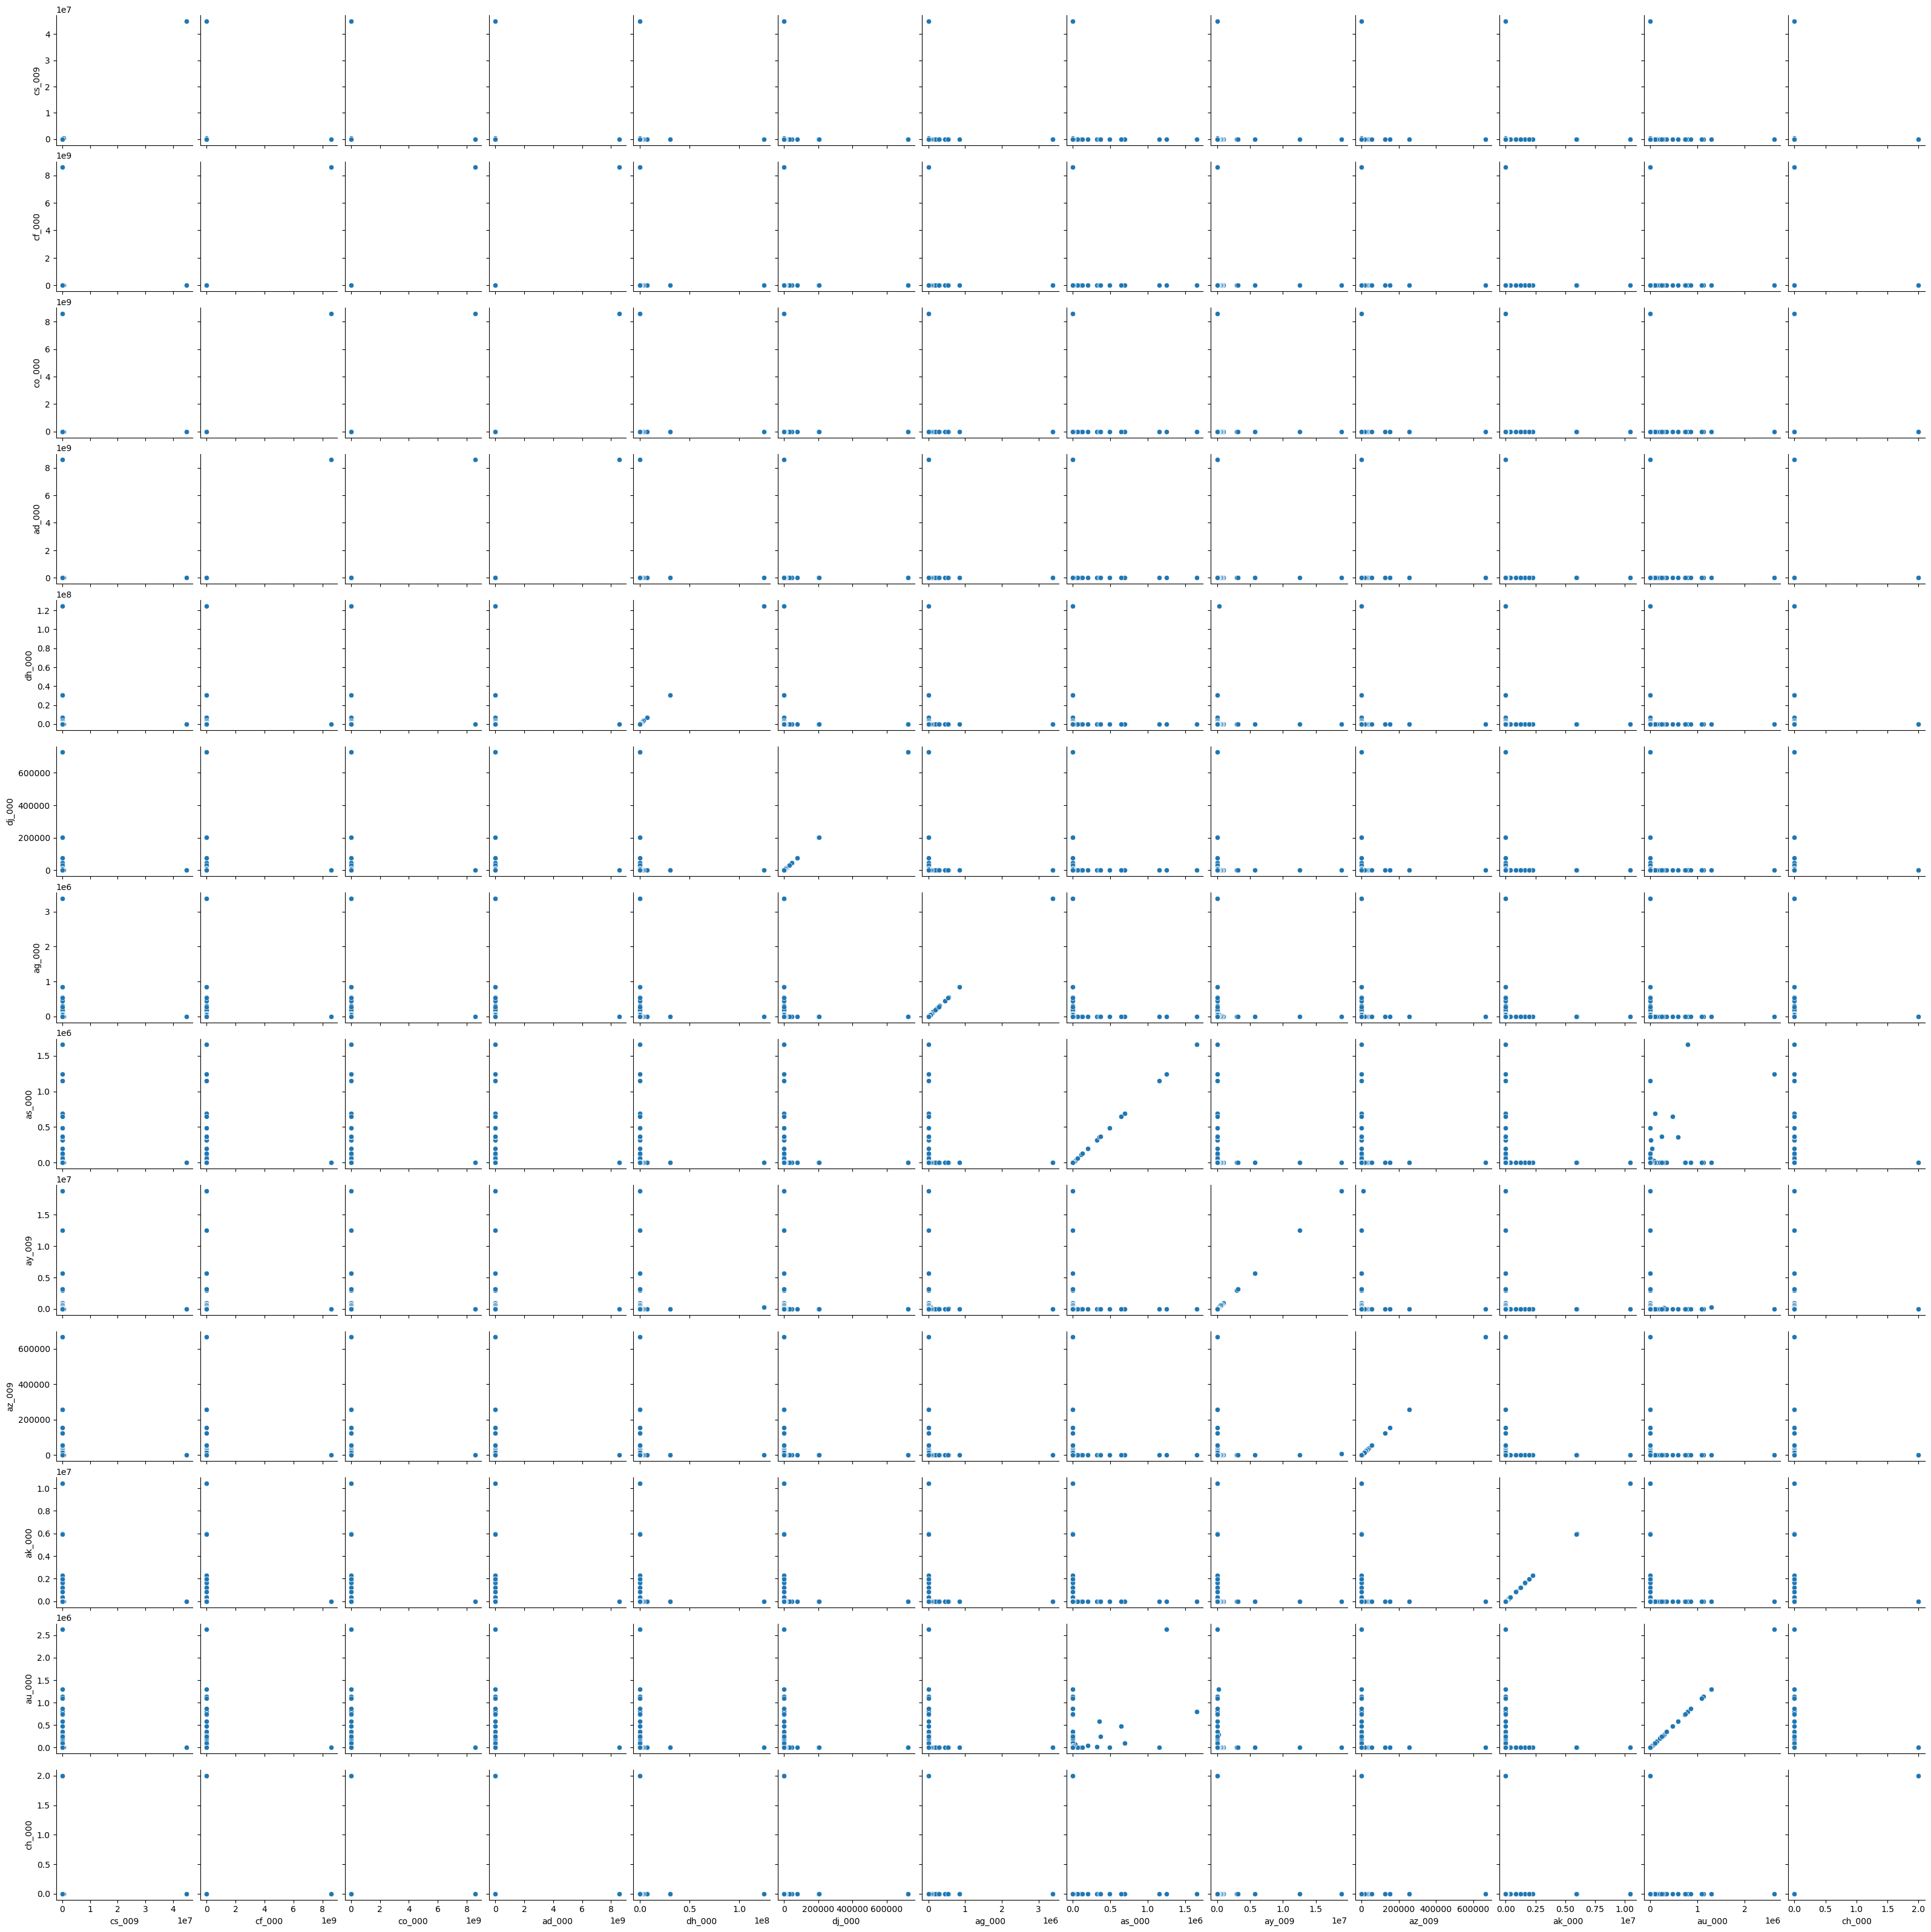

In [15]:
sns.pairplot(train_df[top_features.index.tolist()], diag_kind=None)
plt.show()

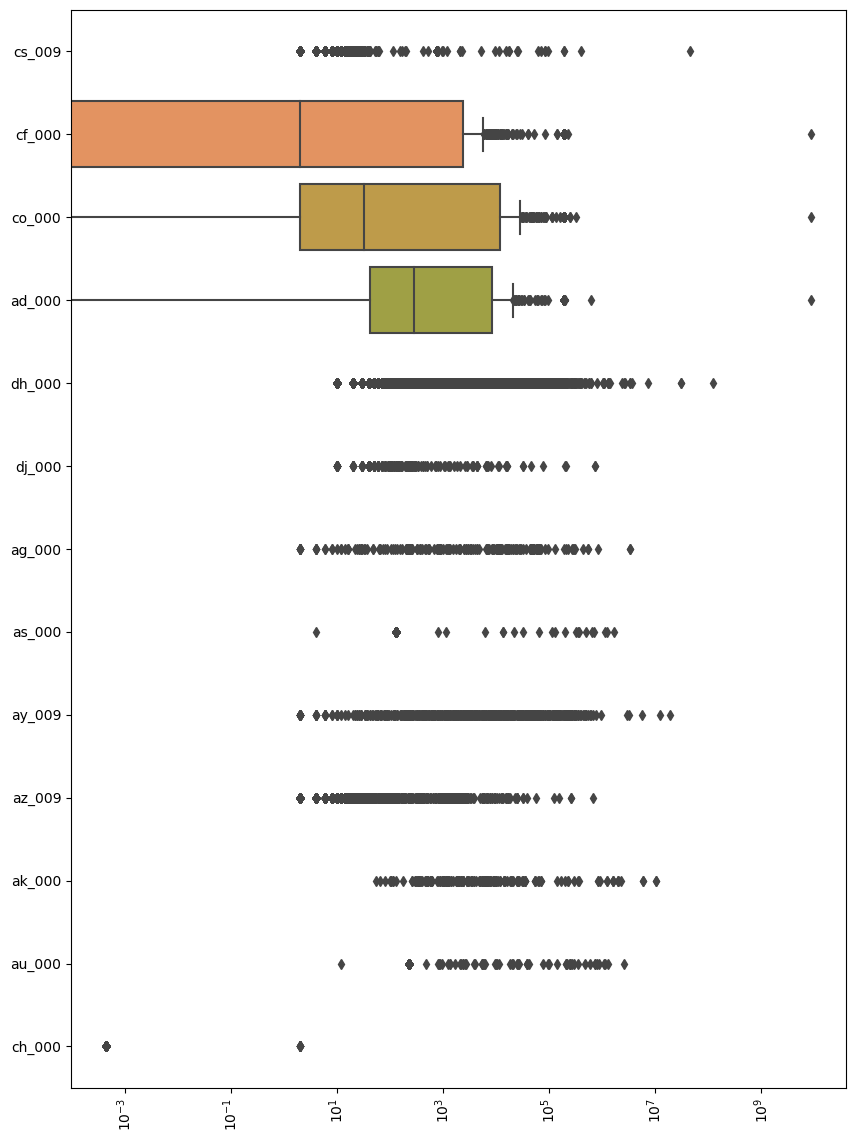

In [49]:
plt.figure(figsize=(10,14))
plt.xticks(rotation=90)
sns.boxplot(data = train_df[top_features.index.tolist()], orient='h' )
plt.xscale('log')


Its difficult to make any conclusion from the scatter or box plots

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [17]:
y_train.value_counts()

0.0    59000
1.0     1000
Name: class, dtype: int64

In [18]:
y_test.value_counts()

0.0    15625
1.0      375
Name: class, dtype: int64

The dataset is heavily imbalanced. We have very less positive classes comapred to negative classes

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROCpackage). Calculate Out of Bag error estimate for your random forset and compare it to the test error

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve , auc


def modelSummary(y_true, y_pred, y_pred_probs, estimator_name, title):
    print("Model Summary for",title)

    cnf_matrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
    ax.set_xlabel('prediction')
    ax.set_ylabel('truth')
    ax.set_title('confusion matrix')
    plt.show()

    tn, fp, fn, tp = cnf_matrix.ravel()
    miss_rate = (fp+fn)/(tn+fp+fn+tp)
    print("Misclassification rate=", miss_rate)
    
    fpr,tpr,_ = roc_curve(y_true, y_pred_probs[:,1])
    roc_auc = auc(fpr, tpr)
    print("AUC is",roc_auc)
    
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name= estimator_name)
    display.plot()
    plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, oob_score=True)
clf = clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_train_pred_probs = clf.predict_proba(X_train)


y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)

In [67]:
y_pred_probs[:,1]

array([0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ])

Model Summary for Train Data


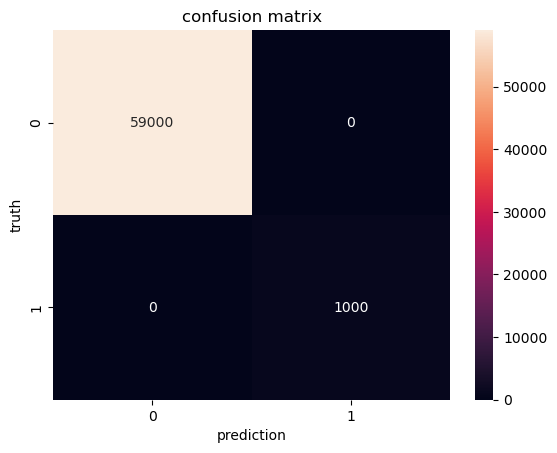

Misclassification rate= 0.0
AUC is 1.0


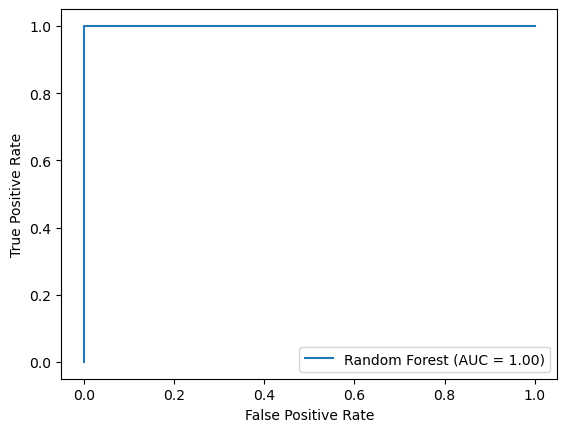

In [71]:
modelSummary(y_train, y_train_pred, y_train_pred_probs, "Random Forest", "Train Data")

Model Summary for Test Data


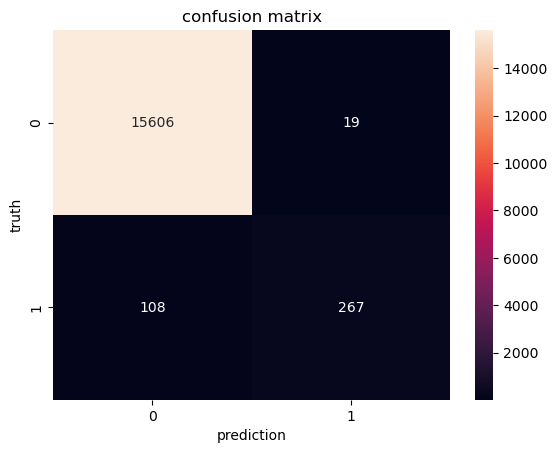

Misclassification rate= 0.0079375
AUC is 0.9931100159999999


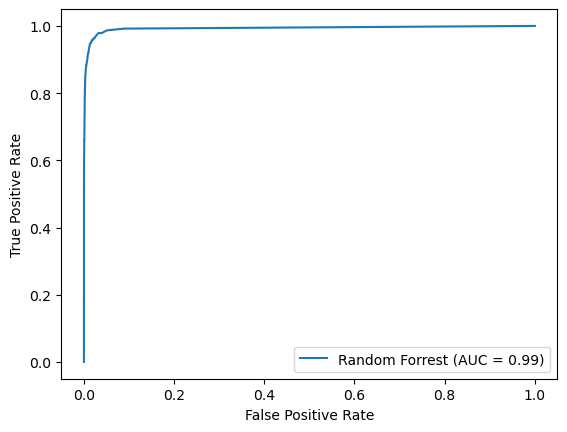

In [72]:
modelSummary(y_test, y_pred, y_pred_probs, "Random Forest", "Test Data")

In [79]:
print("Out of bag error",1-clf.oob_score_)
print("Test error", 1-clf.score(X_test, y_test))

Out of bag error 0.006033333333333335
Test error 0.007937500000000042


## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

In [51]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [73]:
clf2 = RandomForestClassifier(random_state=0, oob_score=True)
clf2 = clf2.fit(X_train_res,y_train_res)



y_train_pred = clf2.predict(X_train_res)
y_train_pred_probs = clf.predict_proba(X_train_res)


y_pred = clf2.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)


Model Summary for Train Data


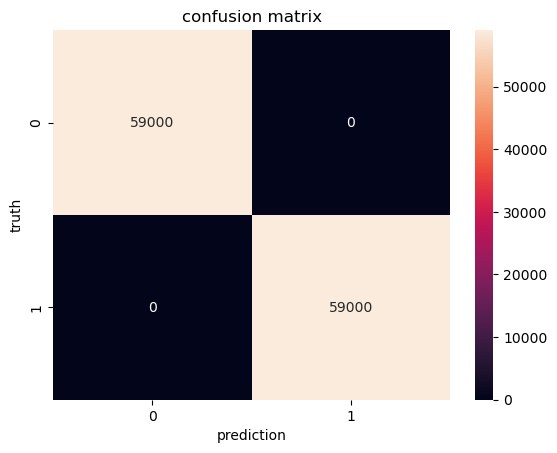

Misclassification rate= 0.0
AUC is 0.995746895575984


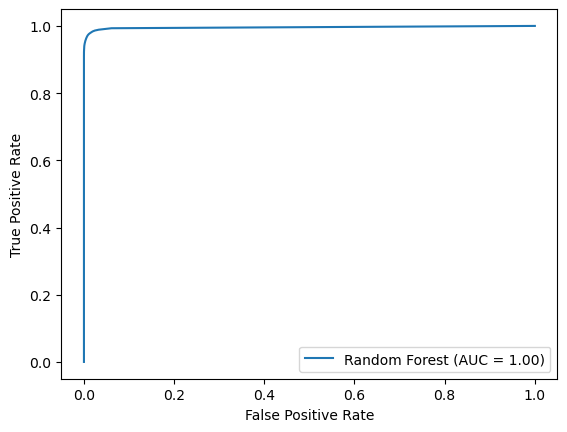

In [74]:
modelSummary(y_train_res, y_train_pred, y_train_pred_probs, "Random Forest", "Train Data")

Model Summary for Test Data


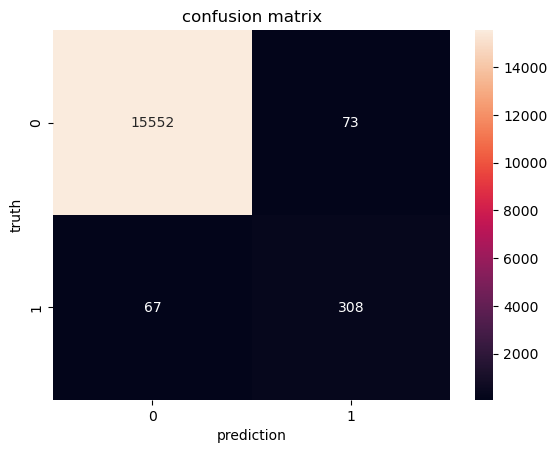

Misclassification rate= 0.00875
AUC is 0.9931100159999999


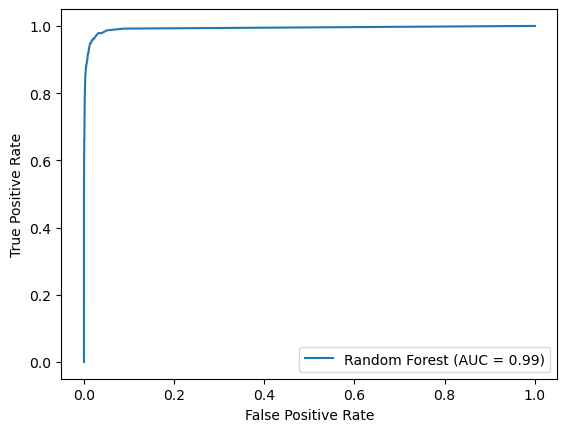

In [75]:
modelSummary(y_test, y_pred, y_pred_probs, "Random Forest", "Test Data")

## (e) XGBoost and Model Trees

In [87]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv_mse = []
alpha =  [0.01,0.1,0.5,1,1.4,1.8,3,5,20]


for a in alpha:
    print("for alpha",a)
    xgbc = xgb.XGBClassifier(alpha = a,  objective="binary:logistic")
    cv_score = cross_val_score(xgbc, X_train, y_train, cv = KFold(n_splits=5), scoring='neg_mean_squared_error')
    cv_mse.append([a,abs(cv_score.mean())])


cv_mse.sort(key=lambda x:x[1])
print("For alpha = {} we ge minimum cross validation error {}".format(cv_mse[0][0], cv_mse[0][1]))

for alpha 0.01
for alpha 0.05
for alpha 0.1
for alpha 0.2
for alpha 0.5
for alpha 0.75
for alpha 1
for alpha 1.2
for alpha 1.4
for alpha 1.6
for alpha 1.8
for alpha 2
for alpha 3
for alpha 4
for alpha 5
for alpha 10
for alpha 20
For alpha = 1 we ge minimum cross validation error 0.005333333333333334


In [88]:
best_alpha = cv_mse[0][0]
xgbc = xgb.XGBClassifier(alpha = a, objective="binary:logistic")
xgbc = xgbc.fit(X_train,y_train)

y_train_pred = xgbc.predict(X_train)
y_train_pred_probs = xgbc.predict_proba(X_train)

y_pred = xgbc.predict(X_test)
y_pred_probs = xgbc.predict_proba(X_test)

Model Summary for Train Data


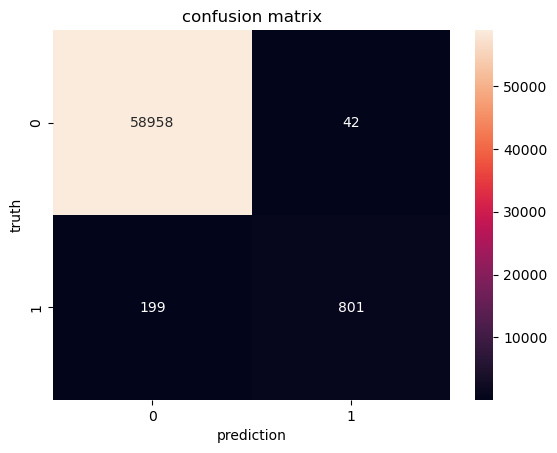

Misclassification rate= 0.004016666666666667
AUC is 0.9946633813559321


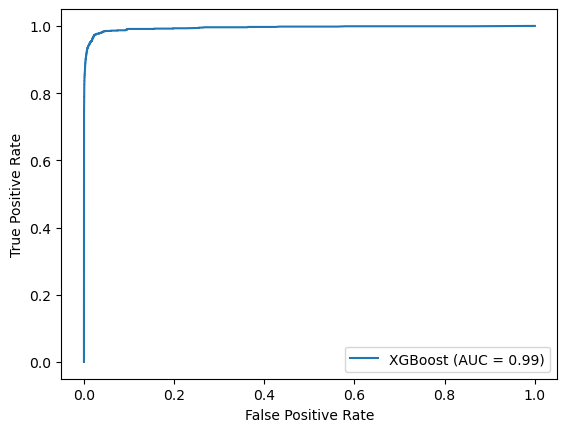

In [89]:
modelSummary(y_train, y_train_pred, y_train_pred_probs, "XGBoost", "Train Data")

Model Summary for Test Data


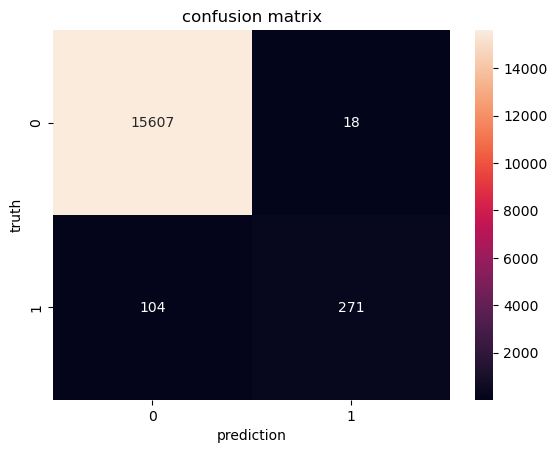

Misclassification rate= 0.007625
AUC is 0.995682304


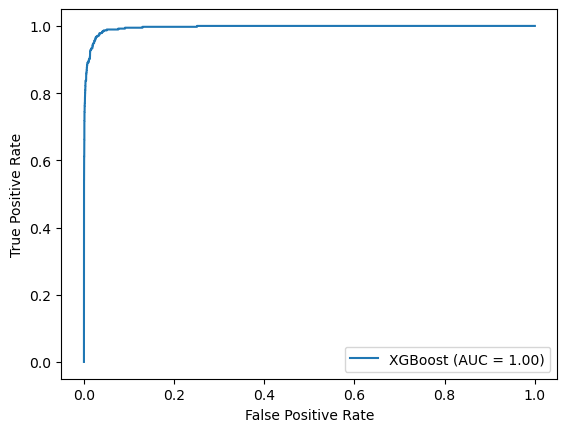

In [90]:
modelSummary(y_test, y_pred, y_pred_probs, "XGBoost", "Test Data")

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized logistic regression

In [96]:
sm = SMOTE(random_state=42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

cv_mse = []
alpha = [0.01,0.1,0.5,1,1.4,1.8,3,5,20]

for a in alpha:
    print("for alpha",a)
    xgbc = xgb.XGBClassifier(alpha = a,  objective="binary:logistic")
    cv_score = cross_val_score(xgbc, X_train_res, y_train_res, cv = KFold(n_splits=5), scoring='neg_mean_squared_error')
    cv_mse.append([a,abs(cv_score.mean())])


cv_mse.sort(key=lambda x:x[1])
print("For alpha = {} we ge minimum cross validation error {}".format(cv_mse[0][0], cv_mse[0][1]))

for alpha 0.01
for alpha 0.1
for alpha 0.5
for alpha 1
for alpha 1.4
for alpha 1.8
for alpha 3
for alpha 5
for alpha 20
For alpha = 0.1 we ge minimum cross validation error 0.002864406779661017


In [97]:
best_alpha = cv_mse[0][0]
xgbc = xgb.XGBClassifier(alpha = a, objective="binary:logistic")
xgbc = xgbc.fit(X_train_res,y_train_res)

y_train_pred = xgbc.predict(X_train_res)
y_train_pred_probs = xgbc.predict_proba(X_train_res)

y_pred = xgbc.predict(X_test)
y_pred_probs = xgbc.predict_proba(X_test)

Model Summary for Train Data


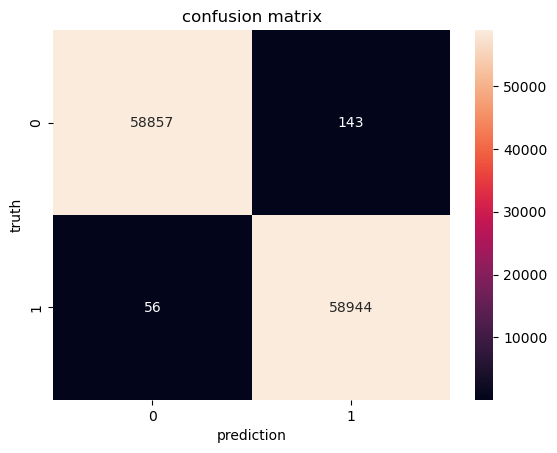

Misclassification rate= 0.0016864406779661016
AUC is 0.9999837084171215


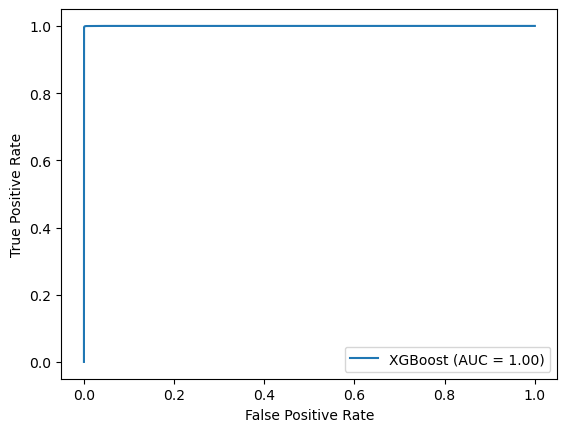

In [98]:
modelSummary(y_train_res, y_train_pred, y_train_pred_probs,"XGBoost", "Train Data")

Model Summary for Test Data


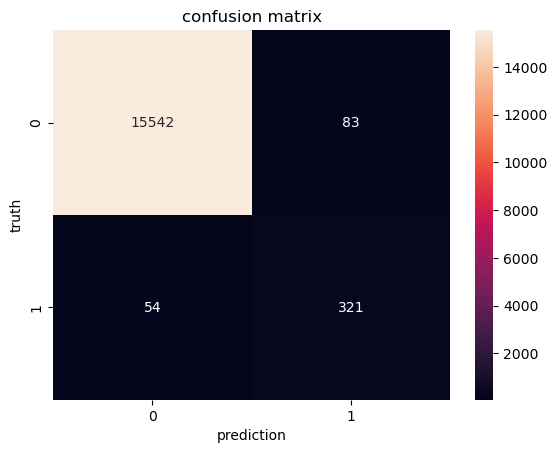

Misclassification rate= 0.0085625
AUC is 0.994928128


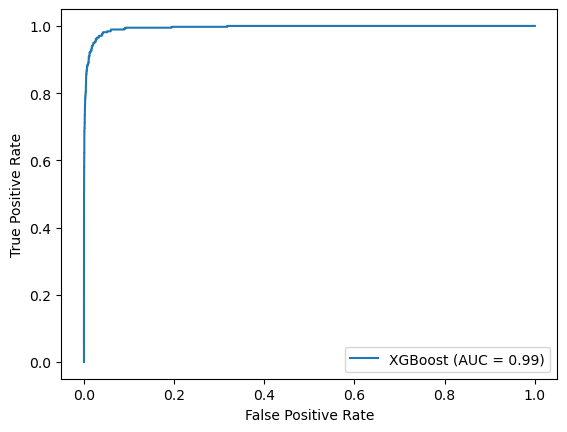

In [99]:
modelSummary(y_test, y_pred, y_pred_probs, "XGBoost", "Test Data")

## 2. ISLR 6.6.3

 a. Ans(iv) Steadily decreases 
  As we increase s from 0, all β 's increase from 0 to their least square estimate values. Training error for 0 β s is the maximum and it steadily decreases to the Ordinary Least Square RSS

 b. (ii) Decrease initially, and then eventually start increasing in a U shape
  When s=0, all β s are 0, the model is extremely simple and has a high test RSS. As we increase s, beta s assume non-zero values and model starts fitting well on test data and so test RSS decreases. Eventually, as beta s approach their full blown OLS values, they start overfitting to the training data, increasing test RSS.

 c. (iii) Steadily increase
  When s=0, the model effectively predicts a constant and has almost no variance. As we increase s, the models includes more β s and their values start increasing. At this point, the values of β s become highly dependent on training data, thus increasing the variance.

  
 d.(iv) Steadily decrease
  When s=0, the model effectively predicts a constant and hence the prediction is far from actual value. Thus bias is high. As s increases, more β s become non-zero and thus the model continues to fit training data better. And thus, bias decreases.

 e.(v) Remains constant
  Irreducible error is model independent and hence irrespective of the choice of s, remains constant.


## 3. ISLR 6.6.5
![pg1.jpg](islr6.6.5pg1.jpg)

![page2.jpg](islr6.6.5pg2.jpg)

## 4. ISLR 8.4.5
Majority Vote approach  
 p = (0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)  
 sum(p>= 0.5) > sum(p< 0.5) -> TRUE  

 The number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED.    

Average probability approach  
 mean(p) -> 0.45  
 The mean is less than the 50% of the threshold, so final classification is green  

# 5. ISLR 9.7.3

a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

In [104]:
points = {'X1' : [3, 2, 4, 1, 2, 4, 4], 
          'X2' : [4, 2, 4, 4, 1, 3, 1], 
          'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
point_df = pd.DataFrame(points)
point_df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


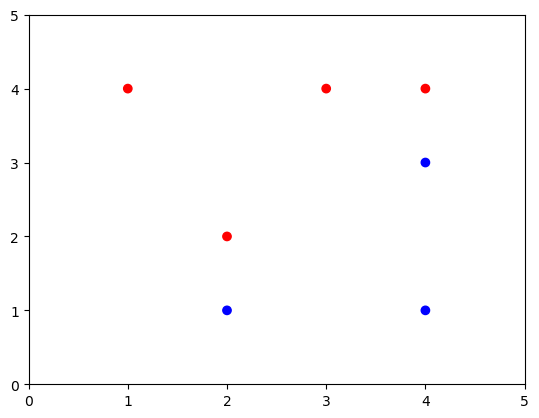

In [105]:
plt.scatter(point_df["X1"], point_df["X2"], c = point_df["Y"] )
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

b)Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

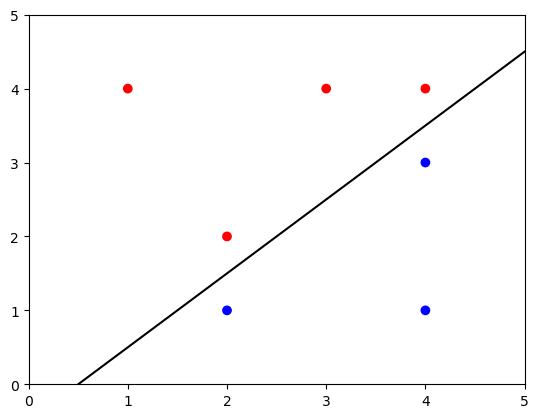

In [102]:
plt.scatter(point_df["X1"], point_df["X2"], c = point_df["Y"] )
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Ans: Classify to Red if X2−X1+0.5>0, and classify to Blue otherwise.

d) On your sketch, indicate the margin for the maximal margin hyperplane.

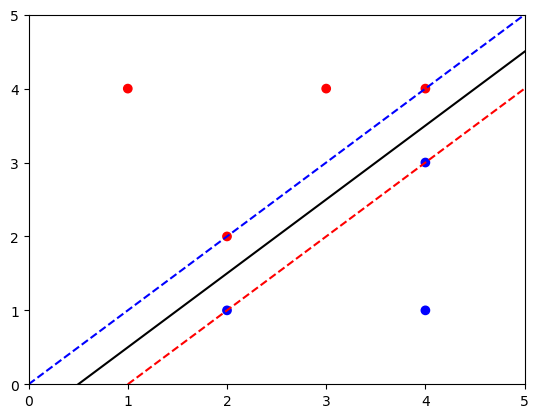

In [103]:
plt.scatter(point_df["X1"], point_df["X2"], c = point_df["Y"] )
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.plot([0,5],[0,5], 'b--')
plt.plot([1,5],[0,4], 'r--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

e) Indicate the support vectors for the maximal margin classifier.

Ans: Support vectors are (2,1), (2,2), (4,3), (4,4).  

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

Ans: The maximal margin will not be influenced by the slight movement of seventh observation as it is not a support vector.  

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

Ans: Show by a green dotted line below

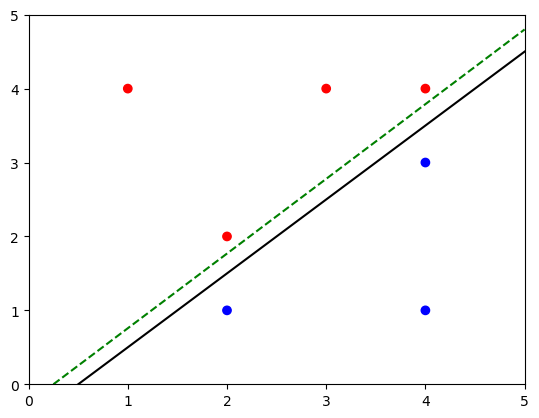

In [114]:
plt.scatter(point_df["X1"], point_df["X2"], c = point_df["Y"] )
plt.plot([0.25, 5], [0., 4.8], '--g')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

Ans: The red triangle will make the classes no longer separable by a hyperpane  

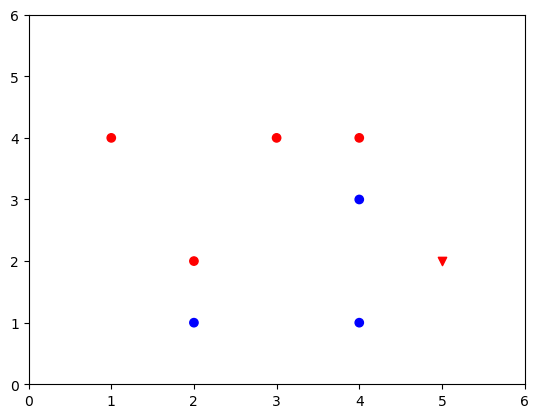

In [118]:
plt.scatter([5], [2], c = ["red"], marker = "v")
plt.scatter(point_df["X1"], point_df["X2"], c = point_df["Y"] )
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

## Refrences



https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe  
https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column,in%20the%20column%20%E2%80%9Ccondition%E2%80%9D.  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html  
https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html  
